## Japanese Newspapers 2001-2021



## DATA UNDERSTANDING

We are now going to read the dataset. The dataset contains information from various newspaper articles. In the first part, our objective is to understand and explore the data. We are importing the library that we will use for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn 

In [2]:
df1=pd.read_csv("english_news.csv", error_bad_lines=False, sep='\t', low_memory = False)
df1.head(5)


<ipython-input-2-6f124a450b21>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1=pd.read_csv("english_news.csv", error_bad_lines=False, sep='\t', low_memory = False)


,source,date,title,author,text
0,Mainichi Shimbun,2021-12-06,"Editorial: Japan govt's 20,000-yen handout mis...",NaN,The Japanese government is trying to boost the...
1,Mainichi Shimbun,2021-12-07,Editorial: Time for Japan PM Kishida to delive...,NaN,"Prime Minister Fumio Kishida, who won a public..."
2,Mainichi Shimbun,2021-12-08,"Editorial: 80 years on from Pearl Harbor, acti...",NaN,It has been 80 years since the start of the Pa...
3,Mainichi Shimbun,2021-12-08,"Yoroku: 80 years later, many lessons still not...",NaN,"""The world has changed completely. The era was..."
4,Mainichi Shimbun,2021-12-08,Promoting respect for human rights behind US '...,NaN,The U.S. administration under President Joe Bi...


As we can see there are 5 columns and every columns specify a feature: for example the column title is about the journal title.
In the above code we are going to explore the dataset(for example shape, statistics description etc..)

In [3]:
df1.shape


(36889, 5)

In [4]:
df1.dtypes

source    object
date      object
title     object
author    object
text      object
dtype: object

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36889 entries, 0 to 36888
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  36889 non-null  object
 1   date    36889 non-null  object
 2   title   36889 non-null  object
 3   author  12846 non-null  object
 4   text    36766 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


In [6]:
valori_nulli = df1.isnull().sum()
print(valori_nulli)

source        0
date          0
title         0
author    24043
text        123
dtype: int64


As we can see the attribute author has more null values and so we should consider this during the cleaning data phase.

In [22]:
# Print all unique values of each column
for col in df1.columns:
    print(col, df1[col].unique())

source ['Mainichi Shimbun' 'The Japan Times']
date ['2021-12-06' '2021-12-07' '2021-12-08' ... '2021-06-05' '2021-06-06'
 '2021-06-07']
title ["Editorial: Japan govt's 20,000-yen handout misses the point on slow 'My Number' ID uptake"
 "Editorial: Time for Japan PM Kishida to deliver 'respectful and generous' politics"
 'Editorial: 80 years on from Pearl Harbor, active efforts to avoid war still needed'
 ... 'Nikkei ends higher, but gains limited'
 'COVID-19 tracker: Osaka reports 72 new cases but posts 15 virus-linked deaths'
 'Listen up, Odairi the cat has something to say']
author [nan 'By ' 'Tetsushi Kajimoto' ... 'Adrian Webber' 'Naoki Matsuda'
 'Brian K. Sullivan']
text ['The Japanese government is trying to boost the uptake of "My Number" personal ID number cards by offering up to 20,000 yen (about $177)-worth of points that can be used for shopping. The incentive is being aimed at people who will use the government-issued IDs as their new health insurance cards, and those on pu

In [7]:
for col in df1:
    if df1[col].dtype == 'object':
        df1[col] = pd.Categorical(df1[col])
df1.dtypes

source    category
date      category
title     category
author    category
text      category
dtype: object

In [8]:
attributes_with_na = df1.columns[df1.isna().any()]
print(attributes_with_na)

Index(['author', 'text'], dtype='object')


Now we are exploring how values assume my target attribute.

In [9]:
valori_unici = df1['source'].unique()
print(valori_unici)

['Mainichi Shimbun', 'The Japan Times']
Categories (2, object): ['Mainichi Shimbun', 'The Japan Times']


In [10]:
mappatura={'Mainichi Shimbun': 0 , 'The Japan Times': 1}
df1['source']=df1['source'].map(mappatura)

In [11]:
#General statistics of categorical attributes
df1.describe(include = 'category').T

,count,unique,top,freq
source,36889,2,1,36815
date,36889,1504,2003-06-06,66
title,36889,36059,KANSAI: Who & What,23
author,12846,1318,Philip Brasor,318
text,36766,35932,This could be due to a conflict with your ad...,5


## DATA EXPLORATION


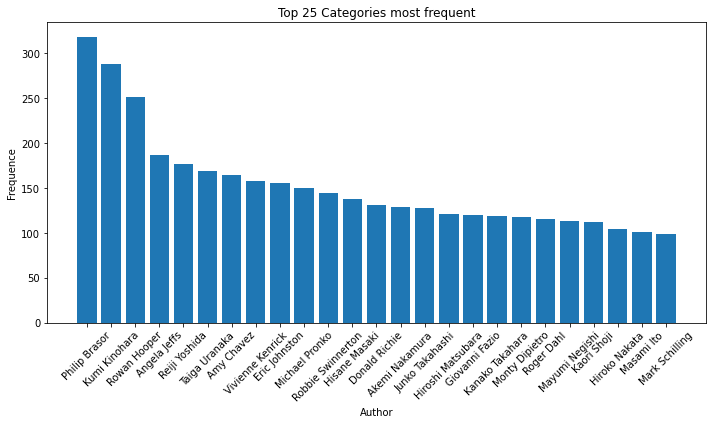

In [13]:
import matplotlib.pyplot as plt

# Count the frequencies of the categories
category_counts = df1['author'].value_counts()

# Number of categories to show
top_n = 25  

# Select the first N most frequent category
top_categories = category_counts.head(top_n)

# Create a bar plot for the most frequent categories
plt.figure(figsize=(10, 6))
plt.bar(top_categories.index, top_categories.values)
plt.xlabel('Author')
plt.ylabel('Frequence')
plt.title(f'Top {top_n} Categories most frequent')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


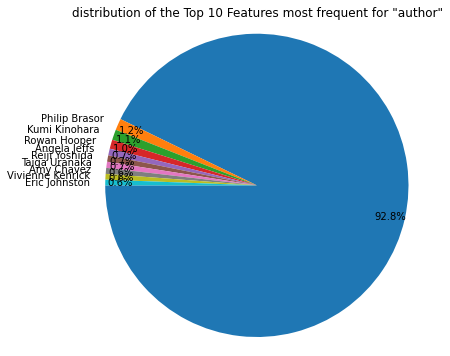

In [99]:

top_n = 10
author_counts = df1['author'].value_counts().head(top_n)

#PIE CHART
plt.figure(figsize=(6, 6))
plt.pie(author_counts, labels=author_counts.index, autopct='%1.1f%%', startangle=180, pctdistance=0.90)
plt.title(f'distribution of the Top {top_n} Features most frequent for "author"', y=1.0)
plt.axis('equal')  # Per ottenere un grafico a torta circolare
plt.show()

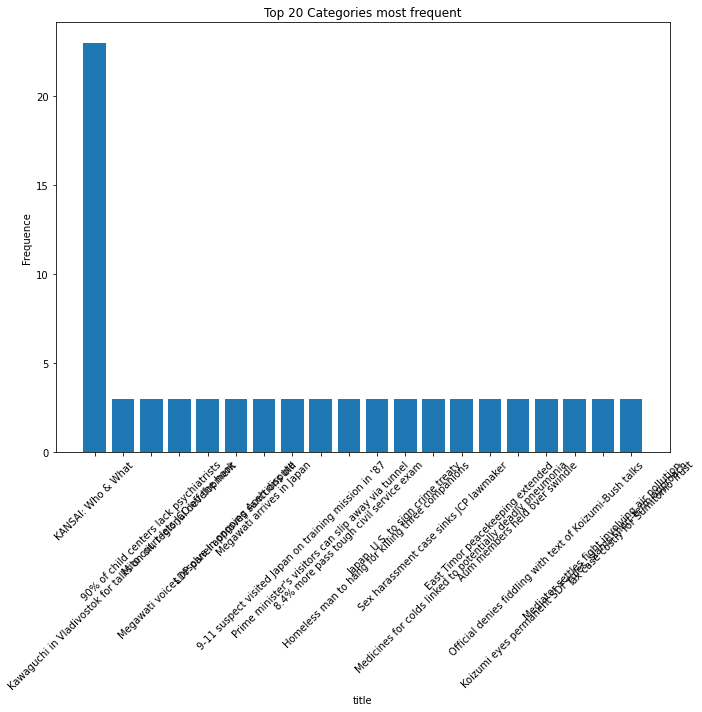

In [16]:

category_counts = df1['title'].value_counts()

top_n = 20  

top_categories = category_counts.head(top_n)

plt.figure(figsize=(10, 10))
plt.bar(top_categories.index, top_categories.values)
plt.xlabel('title')
plt.ylabel('Frequence')
plt.title(f'Top {top_n} Categories most frequent')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


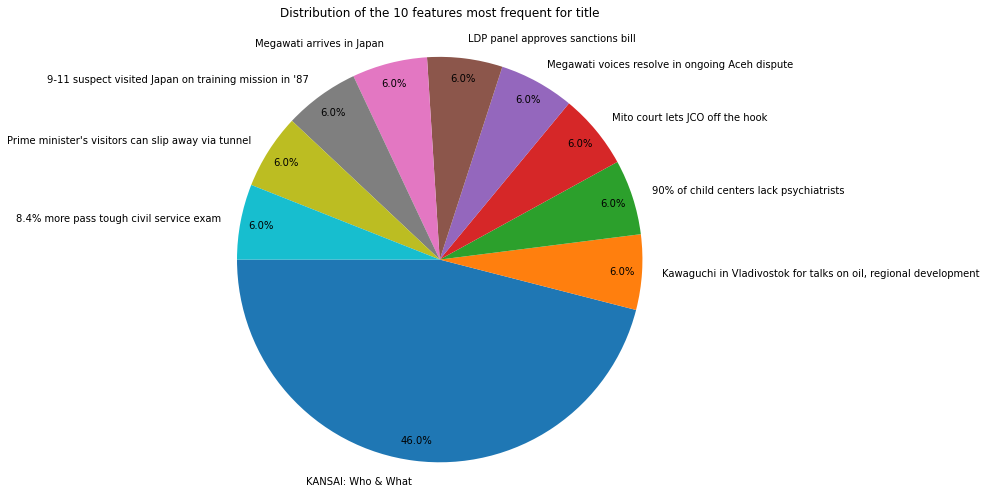

In [22]:

top_n = 10 

author_counts = df1['title'].value_counts().head(top_n)

plt.figure(figsize=(8, 8))
plt.pie(author_counts, labels=author_counts.index, autopct='%1.1f%%', startangle=180, pctdistance=0.90)
plt.title(f'Distribution of the {top_n} features most frequent for title', y=1.05)
plt.axis('equal') 
plt.show()

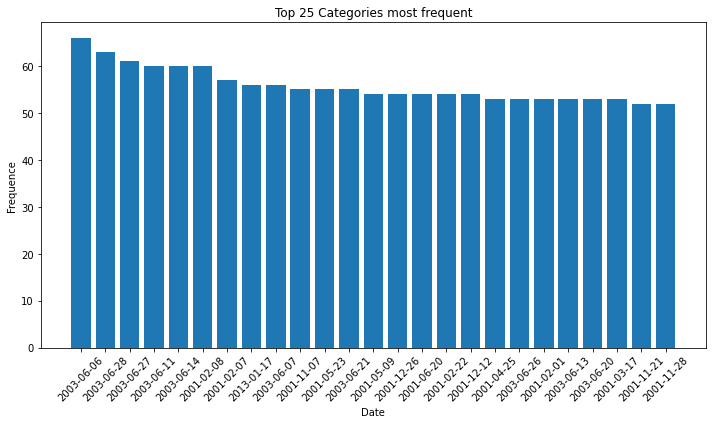

In [18]:

category_counts = df1['date'].value_counts()

top_n = 25  


top_categories = category_counts.head(top_n)

plt.figure(figsize=(10, 6))
plt.bar(top_categories.index, top_categories.values)
plt.xlabel('Date')
plt.ylabel('Frequence')
plt.title(f'Top {top_n} Categories most frequent')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

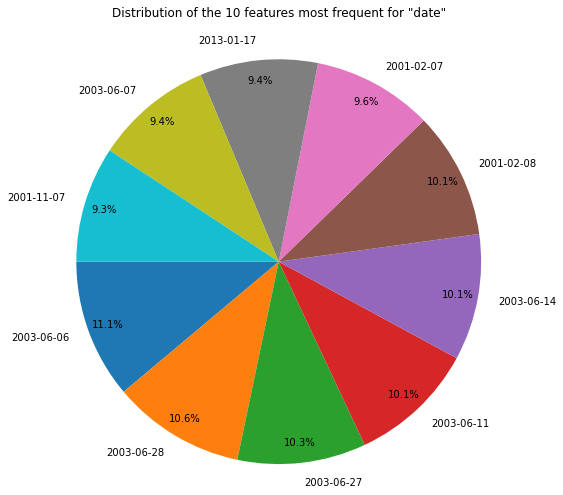

In [24]:
top_n = 10 
author_counts = df1['date'].value_counts().head(top_n)

plt.figure(figsize=(8, 8))
plt.pie(author_counts, labels=author_counts.index, autopct='%1.1f%%', startangle=180, pctdistance=0.90)
plt.title(f'Distribution of the {top_n} features most frequent for "date"', y=1.05)
plt.axis('equal')  
plt.show()

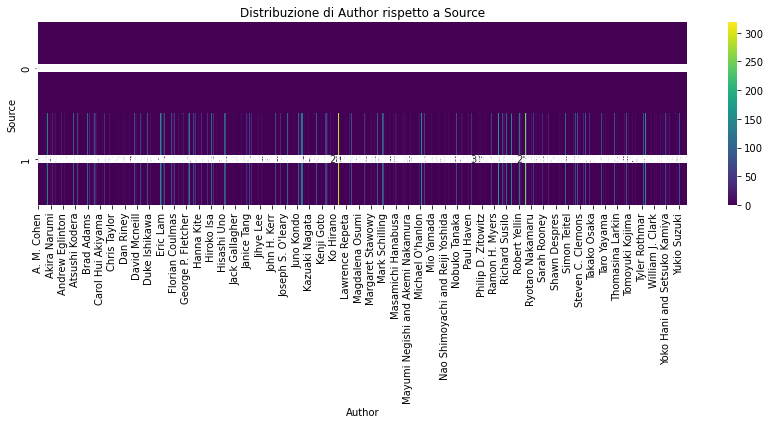

In [34]:

# Creazione di un DataFrame aggregato delle frequenze di "author" per ciascuna classe "source"
author_counts = df1.groupby(['source', 'author']).size().unstack(fill_value=0)

# Crea un grafico a barre per l'attributo "author" aggregato per ciascuna classe "source"
plt.figure(figsize=(12, 6))
sns.heatmap(author_counts, cmap='viridis', annot=True, fmt='d')
plt.xlabel('Author')
plt.ylabel('Source')
plt.title('Distribution of author respect to Source')
plt.tight_layout()
plt.show()



<ipython-input-36-ad273b43b2f4>:14: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



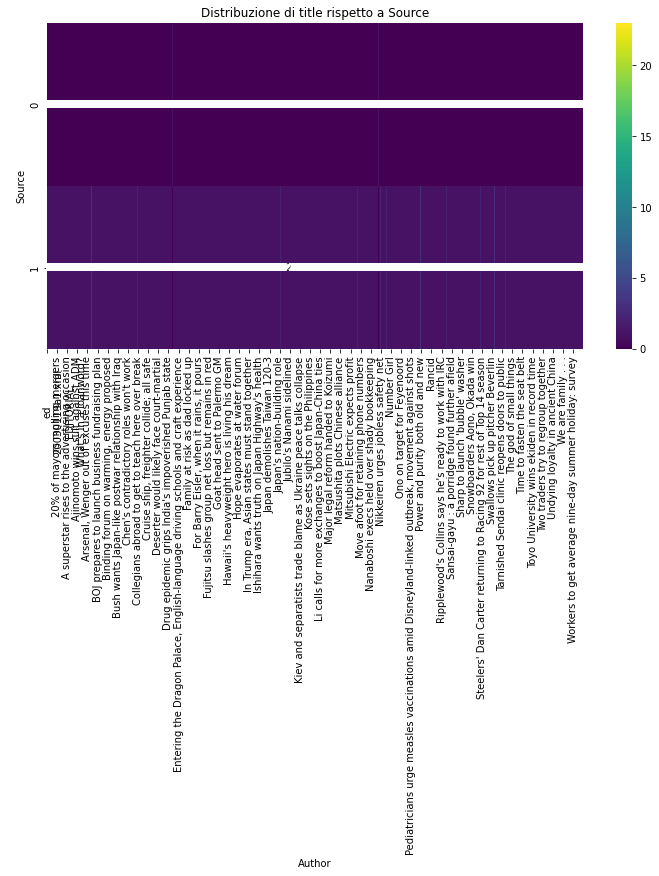

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creazione di un DataFrame aggregato delle frequenze di "author" per ciascuna classe "source"
author_counts = df1.groupby(['source', 'title']).size().unstack(fill_value=0)

# Crea un grafico a barre per l'attributo "author" aggregato per ciascuna classe "source"
plt.figure(figsize=(12, 6))
sns.heatmap(author_counts, cmap='viridis', annot=True, fmt='d')
plt.xlabel('Author')
plt.ylabel('Source')
plt.title('Distribuzione of title respect t0 Source')
plt.tight_layout()
plt.show()


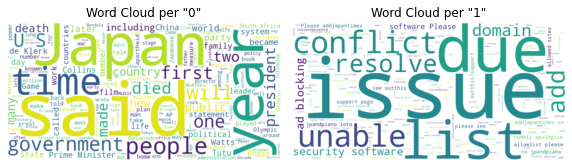

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

classes = df1['source'].unique()

plt.figure(figsize=(12, 8))

for source in classes:
    text_for_source = " ".join(str(text) for text in df1[df1['source'] == source]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_source)

    plt.subplot(2, 3, list(classes).index(source) + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud per "{source}"')
    plt.axis('off')

plt.tight_layout()
plt.show()


With the code above we can see the words most frequent for every target value.

## Data Preparation & Cleaning

In [41]:
df1['author'] = df1['author'].str.strip()  
df1['author'] = df1['author'].replace(np.nan, '')
df1['author']
df1.head()
df1['text'] = df1['text'].str.strip()
df1['text'] = df1['text'].replace(np.nan, '')
valori_nulli = df1['text'].isna()
print(valori_nulli)
valori_nulli = df1.isnull().sum()
print(valori_nulli)

0        False
1        False
2        False
3        False
4        False
         ...  
36884    False
36885    False
36886    False
36887    False
36888    False
Name: text, Length: 36889, dtype: bool
source    0
date      0
title     0
author    0
text      0
dtype: int64


We have seen in the data exploration the dataset is sbilanced because there are a lot of istances classified as positive and fewer negative. If we train our model with a training set low significative we maybe have some classification problem. For example we may have a big accuracy but this doesn't mean the model is accurate.

In [85]:

from sklearn.utils import resample
positive_class = df1[df1['source'] == 1]
negative_class = df1[df1['source'] == 0]
positive_class_undersampled = resample(positive_class, n_samples=len(negative_class), random_state=42)
df2 = pd.concat([positive_class_undersampled, negative_class])



(148, 5)

## Modeling & Processing

In [88]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X = tfidf_vectorizer.fit_transform(df2['text'])
y = df2['source']

#Create Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)








Accuratezza: 0.9666666666666667
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.94      0.97        17

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [91]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)
print(accuracy)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.88      0.94        17

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30

0.9333333333333333


In [100]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)
print(accuracy)


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.94      0.97        17

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667
